In [15]:
import pandas as pd

# peytonというアメフト選手のwikipedia記事のページビュー数
df = pd.read_csv("https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv")
# prophetは欠損値を除外してもちゃんと予測してくれる
df = df.drop(10)
# len(df)
df.tail()

,ds,y
2900,2016-01-16,2483
2901,2016-01-17,10656
2902,2016-01-18,30754
2903,2016-01-19,9190
2904,2016-01-20,7269


In [16]:
# yの増加が大きそうなので対数スケールする
import numpy as np
df['y'] = np.log(df['y'])
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


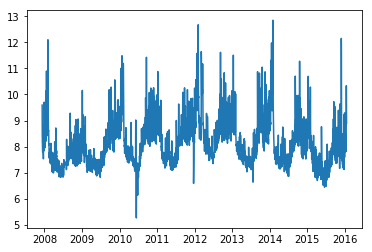

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pd.to_datetime(df['ds']), df['y'])
plt.show()

In [18]:
from fbprophet import Prophet
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True)
m.fit(df)

In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3264,2017-01-15
3265,2017-01-16
3266,2017-01-17
3267,2017-01-18
3268,2017-01-19


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3264,2017-01-15,8.203817,7.491191,8.871650
3265,2017-01-16,8.528910,7.811677,9.244396
3266,2017-01-17,8.316365,7.585740,9.042175
3267,2017-01-18,8.149019,7.407163,8.807808
3268,2017-01-19,8.162126,7.420747,8.889648


In [21]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,9.269212,9.269212,9.269212,8.243608,9.478058,-1.221392,-1.221392,-1.221392,-0.416998,...,-0.416998,-0.416998,-0.416998,0.352158,0.352158,0.352158,0.452236,0.452236,0.452236,8.852213
1,2007-12-11,9.267643,9.267643,9.267643,7.980500,9.223026,-1.221392,-1.221392,-1.221392,-0.666778,...,-0.666778,-0.666778,-0.666778,0.119493,0.119493,0.119493,0.435121,0.435121,0.435121,8.600864
2,2007-12-12,9.266074,9.266074,9.266074,7.788495,9.055066,-1.221392,-1.221392,-1.221392,-0.869296,...,-0.869296,-0.869296,-0.869296,-0.066834,-0.066834,-0.066834,0.418930,0.418930,0.418930,8.396777
3,2007-12-13,9.264505,9.264505,9.264505,7.733979,9.005296,-1.221392,-1.221392,-1.221392,-0.888611,...,-0.888611,-0.888611,-0.888611,-0.071324,-0.071324,-0.071324,0.404105,0.404105,0.404105,8.375894
4,2007-12-14,9.262936,9.262936,9.262936,7.729156,9.012010,-1.221392,-1.221392,-1.221392,-0.900091,...,-0.900091,-0.900091,-0.900091,-0.069747,-0.069747,-0.069747,0.391049,0.391049,0.391049,8.362845
5,2007-12-15,9.261367,9.261367,9.261367,7.549913,8.709221,-1.221392,-1.221392,-1.221392,-1.153136,...,-1.153136,-1.153136,-1.153136,-0.311863,-0.311863,-0.311863,0.380118,0.380118,0.380118,8.108231
6,2007-12-16,9.259798,9.259798,9.259798,7.838575,9.057077,-1.221392,-1.221392,-1.221392,-0.801658,...,-0.801658,-0.801658,-0.801658,0.048117,0.048117,0.048117,0.371617,0.371617,0.371617,8.458140
7,2007-12-17,9.258229,9.258229,9.258229,8.148929,9.378765,-1.221392,-1.221392,-1.221392,-0.503446,...,-0.503446,-0.503446,-0.503446,0.352158,0.352158,0.352158,0.365788,0.365788,0.365788,8.754783
8,2007-12-18,9.256660,9.256660,9.256660,7.927992,9.162367,-1.221392,-1.221392,-1.221392,-0.739086,...,-0.739086,-0.739086,-0.739086,0.119493,0.119493,0.119493,0.362812,0.362812,0.362812,8.517573
9,2007-12-19,9.255091,9.255091,9.255091,7.692314,8.976471,-1.221392,-1.221392,-1.221392,-0.925420,...,-0.925420,-0.925420,-0.925420,-0.066834,-0.066834,-0.066834,0.362806,0.362806,0.362806,8.329671


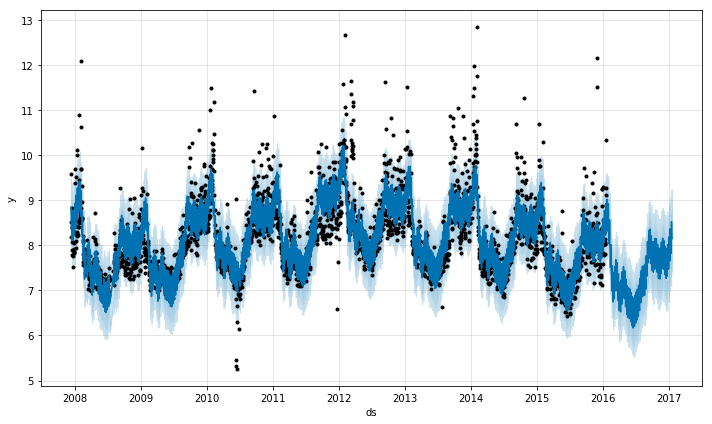

In [22]:
m.plot(forecast);

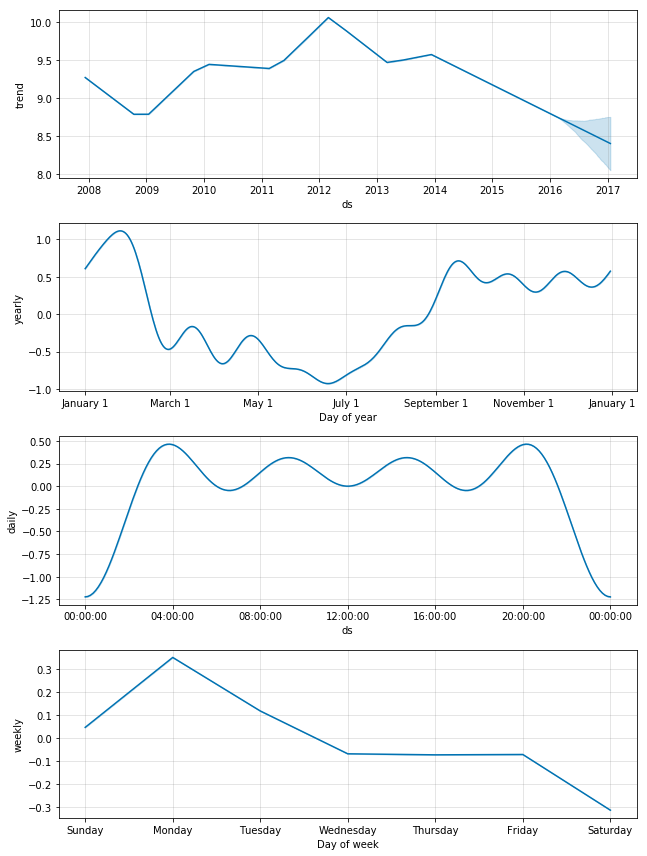

In [23]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);